In [1]:
#load library

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import make_scorer 
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ParameterGrid, GridSearchCV

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#ignore warnings
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#load file
df= pd.read_csv('project1final.csv')

dataframe=df.replace({'Condition':{'Normal1':0, 'Condition1':1, 'Condition5':2}})

# print dataframe size
print("Dataframe Size",  dataframe.shape)


Dataframe Size (110, 13)


In [3]:
# create save path
path = os.getcwd()
savePath = path + '/results/'
print(savePath)

c:\Users\royle\OneDrive\Desktop\Machine Learning\Project 1/results/


## Support Vector Machine 

## Linear Kernel

In [4]:
dataframexx = pd.DataFrame(dataframe.iloc[:,1:])
dataframeyy = pd.DataFrame(dataframe.iloc[:,0])
alt_path11 = savePath + 'linear_kernel'


 Iteration: 1
Training Data Length: 88
Verification data Length: 22
Confusion Matrix:
 [[8 1 1]
 [1 5 0]
 [2 0 4]]
Machine Quality Accuracy for Normal1: 0.8
Machine Quality Accuracy for Condition1: 0.83
Machine Quality Accuracy for Condition5: 0.67
Accuracy: 0.77
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.83      0.83      0.83         6
           2       0.80      0.67      0.73         6

    accuracy                           0.77        22
   macro avg       0.79      0.77      0.77        22
weighted avg       0.78      0.77      0.77        22



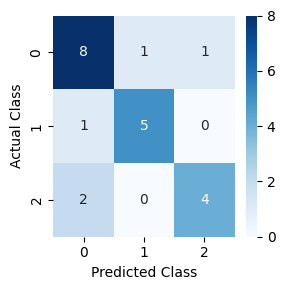


 Iteration: 2
Training Data Length: 88
Verification data Length: 22
Confusion Matrix:
 [[9 1 0]
 [1 4 0]
 [2 0 5]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.8
Machine Quality Accuracy for Condition5: 0.71
Accuracy: 0.82
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.80      0.80      0.80         5
           2       1.00      0.71      0.83         7

    accuracy                           0.82        22
   macro avg       0.85      0.80      0.82        22
weighted avg       0.84      0.82      0.82        22



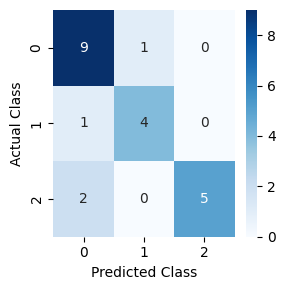


 Iteration: 3
Training Data Length: 88
Verification data Length: 22
Confusion Matrix:
 [[10  0  0]
 [ 2  3  0]
 [ 1  0  6]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.86
Accuracy: 0.86
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.60      0.75         5
           2       1.00      0.86      0.92         7

    accuracy                           0.86        22
   macro avg       0.92      0.82      0.85        22
weighted avg       0.90      0.86      0.86        22



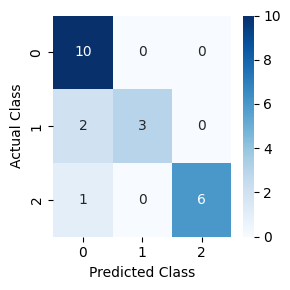


 Iteration: 4
Training Data Length: 88
Verification data Length: 22
Confusion Matrix:
 [[9 1 0]
 [2 3 0]
 [1 0 6]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.86
Accuracy: 0.82
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.75      0.60      0.67         5
           2       1.00      0.86      0.92         7

    accuracy                           0.82        22
   macro avg       0.83      0.79      0.80        22
weighted avg       0.83      0.82      0.82        22



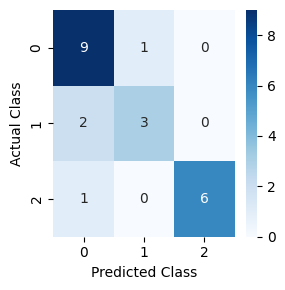


 Iteration: 5
Training Data Length: 88
Verification data Length: 22
Confusion Matrix:
 [[9 0 1]
 [1 4 0]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.8
Machine Quality Accuracy for Condition5: 1.0
Accuracy: 0.91
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      0.80      0.89         5
           2       0.88      1.00      0.93         7

    accuracy                           0.91        22
   macro avg       0.92      0.90      0.91        22
weighted avg       0.91      0.91      0.91        22



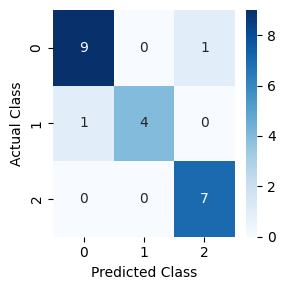

In [5]:
#define SVC model

#linear
model21 =SVC(kernel='linear') 

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=5, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
n=1
for tr_i, te_i in cv.split(dataframexx, dataframeyy):
    X_train = dataframexx.iloc[tr_i]
    X_test = dataframexx.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = dataframeyy.iloc[tr_i]
    y_v = dataframeyy.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print('\n Iteration:', n)
    print("Training Data Length:", len(y_tr))
    print("Verification data Length:", len(y_v))
    n=n+1
    
    #fit decision tree model and predict y_p
    model21.fit(X_tr, y_tr)
    y_p = model21.predict(X_v)

    #calculate each condition accuracy in each fold
    matrix = confusion_matrix(y_v,y_p)
    new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
    print('Confusion Matrix:\n',matrix)
   
    for i in range(0,len(new_matrix)):
        def accuracy_conditions(i):
            switcher = {
                0:'Machine Quality Accuracy for Normal1:',
                1:'Machine Quality Accuracy for Condition1:',
                2:'Machine Quality Accuracy for Condition5:',
            }
            return switcher.get(i)
        print(accuracy_conditions(i),new_matrix[i])
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)

    #generate classification report
    print("SVM Classification_Report:\n", classification_report(y_v, y_p))
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(3,3))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    ax.set(xlabel='Predicted Class', ylabel='Actual Class')
    plt.tight_layout()
    plt.savefig(alt_path11 + '/' + 'confusion_matrix_' + str(len(accuracy_l)) + '.png')
    plt.show()

In [6]:
##  Mean accuracy score Linear Kernel
model_name = 'Injection Moulding'
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

Injection Moulding score :  0.84


## Polynomial Degree Kernel

In [7]:
dataframexx = pd.DataFrame(dataframe.iloc[:,1:])
dataframeyy = pd.DataFrame(dataframe.iloc[:,0])
alt_path12 = savePath + 'poly_kernel'


 Iteration: 1
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[10  0  0]
 [ 5  1  0]
 [ 2  0  4]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.17
Machine Quality Accuracy for Condition5: 0.67
Accuracy: 0.68
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.17      0.29         6
           2       1.00      0.67      0.80         6

    accuracy                           0.68        22
   macro avg       0.86      0.61      0.61        22
weighted avg       0.81      0.68      0.63        22



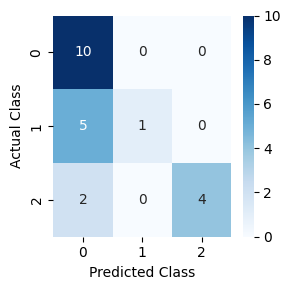


 Iteration: 2
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[10  0  0]
 [ 1  4  0]
 [ 2  0  5]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.8
Machine Quality Accuracy for Condition5: 0.71
Accuracy: 0.86
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.80      0.89         5
           2       1.00      0.71      0.83         7

    accuracy                           0.86        22
   macro avg       0.92      0.84      0.86        22
weighted avg       0.90      0.86      0.86        22



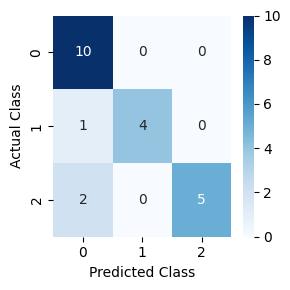


 Iteration: 3
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[10  0  0]
 [ 3  2  0]
 [ 3  0  4]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.4
Machine Quality Accuracy for Condition5: 0.57
Accuracy: 0.73
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.40      0.57         5
           2       1.00      0.57      0.73         7

    accuracy                           0.73        22
   macro avg       0.88      0.66      0.69        22
weighted avg       0.83      0.73      0.71        22



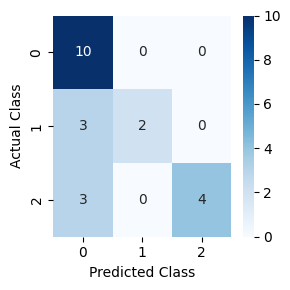


 Iteration: 4
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[9 1 0]
 [2 3 0]
 [2 0 5]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.71
Accuracy: 0.77
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.75      0.60      0.67         5
           2       1.00      0.71      0.83         7

    accuracy                           0.77        22
   macro avg       0.81      0.74      0.76        22
weighted avg       0.80      0.77      0.77        22



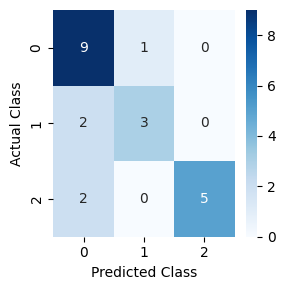


 Iteration: 5
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[10  0  0]
 [ 2  3  0]
 [ 3  0  4]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.57
Accuracy: 0.77
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.60      0.75         5
           2       1.00      0.57      0.73         7

    accuracy                           0.77        22
   macro avg       0.89      0.72      0.76        22
weighted avg       0.85      0.77      0.77        22



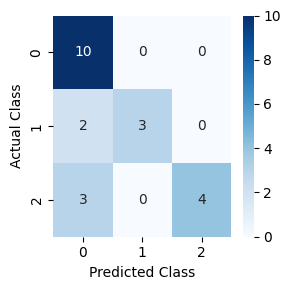

In [8]:
#define SVC model

#poly
model22 =SVC(kernel='poly',degree=3) 

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=5, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
n=1
for tr_i, te_i in cv.split(dataframexx, dataframeyy):
    X_train = dataframexx.iloc[tr_i]
    X_test = dataframexx.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = dataframeyy.iloc[tr_i]
    y_v = dataframeyy.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print('\n Iteration:', n)
    print("Training Data Length:", len(y_tr))
    print("Verification Data Length:", len(y_v))
    n=n+1
    
    #fit decision tree model and predict y_p
    model22.fit(X_tr, y_tr)
    y_p = model22.predict(X_v)

    #calculate each condition accuracy in each fold
    matrix = confusion_matrix(y_v,y_p)
    new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
    print('Confusion Matrix:\n',matrix)
   
    for i in range(0,len(new_matrix)):
        def accuracy_conditions(i):
            switcher = {
                0:'Machine Quality Accuracy for Normal1:',
                1:'Machine Quality Accuracy for Condition1:',
                2:'Machine Quality Accuracy for Condition5:',
            }
            return switcher.get(i)
        print(accuracy_conditions(i),new_matrix[i])
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)

    #generate classification report
    print("SVM Classification_Report:\n", classification_report(y_v, y_p))
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(3,3))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    ax.set(xlabel='Predicted Class', ylabel='Actual Class')
    plt.tight_layout()
    plt.savefig(alt_path12 + '/' + 'confusion_matrix_' + str(len(accuracy_l)) + '.png')
    plt.show()

In [9]:
##  Mean accuracy score Poly 3 Degrees 
model_name = 'Injection Moulding'
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

Injection Moulding score :  0.76


## RBF Kernel

In [10]:
dataframexx = pd.DataFrame(dataframe.iloc[:,1:])
dataframeyy = pd.DataFrame(dataframe.iloc[:,0])
alt_path13 = savePath + 'rbf_kernel'


 Iteration: 1
Training data Length: 88
Verification Data length: 22
Confusion Matrix:
 [[9 0 1]
 [2 4 0]
 [2 0 4]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.67
Machine Quality Accuracy for Condition5: 0.67
Accuracy: 0.77
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       1.00      0.67      0.80         6
           2       0.80      0.67      0.73         6

    accuracy                           0.77        22
   macro avg       0.83      0.74      0.77        22
weighted avg       0.81      0.77      0.77        22



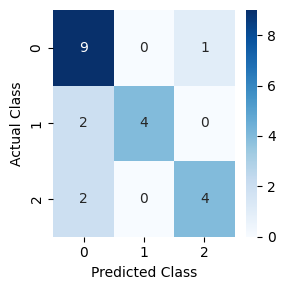


 Iteration: 2
Training data Length: 88
Verification Data length: 22
Confusion Matrix:
 [[9 1 0]
 [1 4 0]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.8
Machine Quality Accuracy for Condition5: 1.0
Accuracy: 0.91
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         7

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22



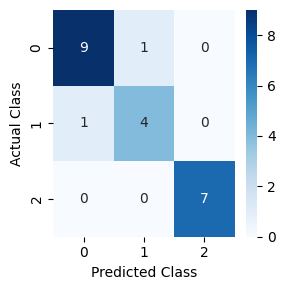


 Iteration: 3
Training data Length: 88
Verification Data length: 22
Confusion Matrix:
 [[10  0  0]
 [ 2  3  0]
 [ 1  0  6]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 0.86
Accuracy: 0.86
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.60      0.75         5
           2       1.00      0.86      0.92         7

    accuracy                           0.86        22
   macro avg       0.92      0.82      0.85        22
weighted avg       0.90      0.86      0.86        22



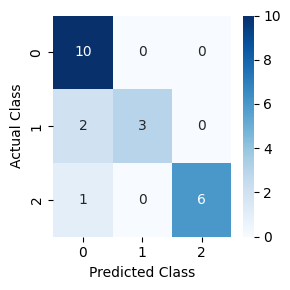


 Iteration: 4
Training data Length: 88
Verification Data length: 22
Confusion Matrix:
 [[9 1 0]
 [1 4 0]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.8
Machine Quality Accuracy for Condition5: 1.0
Accuracy: 0.91
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         7

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22



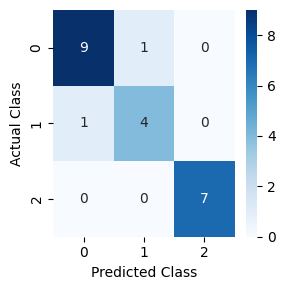


 Iteration: 5
Training data Length: 88
Verification Data length: 22
Confusion Matrix:
 [[9 0 1]
 [2 3 0]
 [0 0 7]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.6
Machine Quality Accuracy for Condition5: 1.0
Accuracy: 0.86
SVM Classification_Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      0.60      0.75         5
           2       0.88      1.00      0.93         7

    accuracy                           0.86        22
   macro avg       0.90      0.83      0.85        22
weighted avg       0.88      0.86      0.86        22



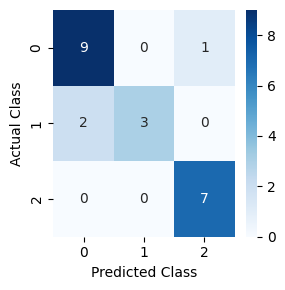

In [11]:
#define SVC model

#rbf
model23 =SVC(kernel='rbf', random_state=0, gamma=.08, C=1.0) 

scaler = StandardScaler()
#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=5, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

n=1
for tr_i, te_i in cv.split(dataframexx, dataframeyy):
    X_train = dataframexx.iloc[tr_i]
    X_test = dataframexx.iloc[te_i]
    X_tr = scaler.fit_transform(X_train)
    X_v = scaler.transform(X_test)
    y_tr = dataframeyy.iloc[tr_i]
    y_v = dataframeyy.iloc[te_i]
    
    print('\n Iteration:', n)
    print("Training data Length:", len(y_tr))
    print("Verification Data length:", len(y_v))
    n=n+1
    
    #fit decision tree model and predict y_p
    model23.fit(X_tr, y_tr)
    y_p = model23.predict(X_v)

    #calculate each condition accuracy in each fold
    matrix = confusion_matrix(y_v,y_p)
    new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
    print('Confusion Matrix:\n',matrix)
   
    for i in range(0,len(new_matrix)):
        def accuracy_conditions(i):
            switcher = {
                0:'Machine Quality Accuracy for Normal1:',
                1:'Machine Quality Accuracy for Condition1:',
                2:'Machine Quality Accuracy for Condition5:',
            }
            return switcher.get(i)
        print(accuracy_conditions(i),new_matrix[i])
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)

    #generate classification report
    print("SVM Classification_Report:\n", classification_report(y_v, y_p))
    
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(3,3))
    
    #use heatmap
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    ax.set(xlabel='Predicted Class', ylabel='Actual Class')
    plt.tight_layout()
    plt.savefig(alt_path13 + '/' + 'confusion_matrix_' + str(len(accuracy_l)) + '.png')
    plt.show()


In [12]:
##  Mean accuracy score RBF Kernel
model_name = 'Injection Moulding'
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

Injection Moulding score :  0.86


## Feature Importance


Feature names: ['Mould temperature control unit 1', 'Cylinder heating zone 4', 'Material cushion', 'Maximum injection pressure', 'Cylinder heating zone 1', 'Cylinder heating zone 2', 'Dosage time', 'Cylinder heating zone 5', 'Cylinder heating zone 3', 'Cycle time', 'Switch-over volume', 'Injection time']
Feature importance: [0.3621274  0.08915617 0.08532612 0.08060856 0.06645375 0.0619083
 0.06080778 0.06033281 0.05859139 0.03329913 0.03172844 0.00966016]


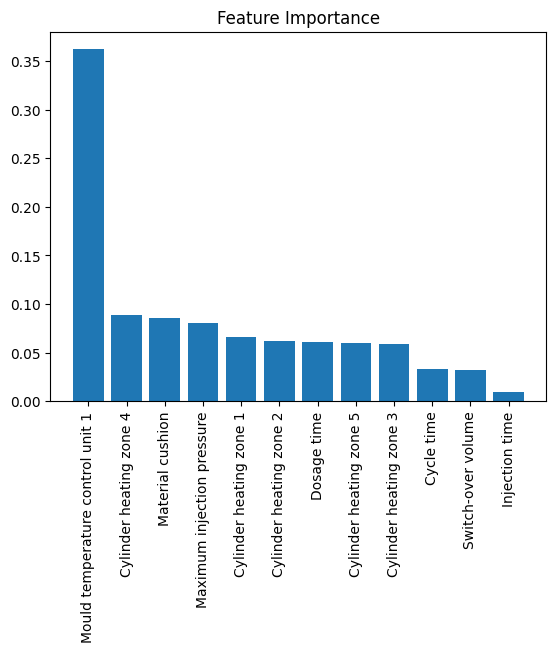

In [13]:
# Identifying Important Features in Random Forests
# Calculate feature importances

model29 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state=0, n_jobs=-1)
model29.fit(dataframexx,dataframeyy)

importances = model29.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
#print("indices:", indices)

# Rearrange feature names so they match the sorted feature importances
names = [dataframexx.columns[i] for i in indices]
print("Feature names:", names)
print("Feature importance:", importances[indices]) 

#Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(dataframexx.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(dataframexx.shape[1]), names, rotation=90)

# Show plot
plt.show()



## Comparing and Selecting Features

In [14]:
for m in range(len(dataframexx.columns)):
    m = m + 1
    selector = SelectFromModel(model29, max_features=m,threshold=-np.inf)
    features_important= selector.fit_transform(dataframexx, dataframeyy.values.ravel())
    print('No.of Features:', m)
    #convert to dataframe 
    df_Xx = pd.DataFrame(features_important)
    df_yy = dataframeyy
    
    # Create SVC classifier object
    model77 =SVC(kernel='rbf', random_state=0, gamma=.08, C=1.0) 

    #split data into 4/5 for training and 1/5 for testing
    cv = sk(n_splits=5, shuffle=True, random_state=0)

    # accuracy list
    accuracy_2 = []

    u = 1
    for tr_i, te_i in cv.split(df_Xx, df_yy):
        X_train = df_Xx.iloc[tr_i]
        X_test = df_Xx.iloc[te_i]
        X_tr = scaler.fit_transform(X_train)
        X_v = scaler.transform(X_test)
        y_tr = df_yy.iloc[tr_i]
        y_v = df_yy.iloc[te_i]
        print("\n Iteration:", u)
        print("Training Data Length:", len(y_tr))
        print("Verification Data Length:", len(y_v))
        u = u + 1 
        
        # Fitting RBF to the Training set
        model77.fit(X_tr, y_tr)
        y_p = model77.predict(X_v)

        #calculate each condition accuracy in each fold
        matrix = confusion_matrix(y_v,y_p)
        new_matrix = (matrix.diagonal()/matrix.sum(axis=1)).round(2)
        print('Confusion Matrix:\n',matrix)
    
        for i in range(0,len(new_matrix)):
            def accuracy_conditions(i):
                switcher = {
                    0:'Machine Quality Accuracy for Normal1:',
                    1:'Machine Quality Accuracy for Condition1:',
                    2:'Machine Quality Accuracy for Condition5:',
                }
                return switcher.get(i)
            print(accuracy_conditions(i),new_matrix[i])
        
        #calculate overall accuracy
        accuracy = np.mean(acs(y_v, y_p))
        # print("Accuracy:", accuracy.round(2))
        accuracy_2.append(accuracy)
        
        ##  classification report
        print("RF Prediction Report", "\n", classification_report(y_v,y_p))

    #display the accuracy of each iteration 
    print('List of Accuracy:',accuracy_2)

    # calculating each mean     
    model_name = 'Injection Moulding'
    m_sc = round(np.mean(accuracy_2), 2)
    print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

    # clear list 
    del accuracy_2[:]

    print('--------------------------------------------------------------------------------------------')

No.of Features: 1

 Iteration: 1
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[9 0 1]
 [5 0 1]
 [0 0 6]]
Machine Quality Accuracy for Normal1: 0.9
Machine Quality Accuracy for Condition1: 0.0
Machine Quality Accuracy for Condition5: 1.0
RF Prediction Report 
               precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.00      0.00      0.00         6
           2       0.75      1.00      0.86         6

    accuracy                           0.68        22
   macro avg       0.46      0.63      0.54        22
weighted avg       0.50      0.68      0.57        22


 Iteration: 2
Training Data Length: 88
Verification Data Length: 22
Confusion Matrix:
 [[10  0  0]
 [ 5  0  0]
 [ 2  0  5]]
Machine Quality Accuracy for Normal1: 1.0
Machine Quality Accuracy for Condition1: 0.0
Machine Quality Accuracy for Condition5: 0.71
RF Prediction Report 
               precision    recall  f1-score   sup

## Prediction of the New Observation Using RBF with 7 Features

In [15]:
# # For a new observation 
# # mould temp, zone4, cushion, max inj pressure, zone1, zone2, dosage time
observation = [[ 94.3, 304.2, 1.01, 1511.4, 277.8, 286.9, 2.96]]

#features select: 7
selector1 = SelectFromModel(model29, max_features=7,threshold=-np.inf)
features_important= selector1.fit_transform(dataframexx, dataframeyy.values.ravel())
df_Xx = pd.DataFrame(features_important)
df_yy = dataframeyy

# Create SVC classifier object
model66 =SVC(kernel='rbf', random_state=0, gamma=.08, C=1.0) 
cv = sk(n_splits=5, shuffle=True, random_state=0)

for tr_i, te_i in cv.split(df_Xx, df_yy):
        X_train = df_Xx.iloc[tr_i]
        X_test = df_Xx.iloc[te_i]
        X_tr = scaler.fit_transform(X_train)
        X_v = scaler.transform(X_test)
        y_tr = df_yy.iloc[tr_i]
        y_v = df_yy.iloc[te_i]
        model66.fit(X_tr, y_tr)

# Predict observation's class
y = model66.predict(observation)
print("prediction class:", y)

prediction class: [2]
